In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import pickle

In [23]:
shapefile = gpd.read_file('map/deped_school_location_with_enrolment_2014_2015.shp')
shapefile

,school_id,school_nam,region,province,municipali,division,district,enrollment,offering,mooe_in_ph,latitude,longitude,cartodb_id,created_at,updated_at,geometry
0,111223,Casian ES,Region IV-B,Palawan,Taytay,Palawan,Taytay I,421,ES,234000.0,NaN,NaN,11643,2015-04-16,2015-04-16,None
1,101079,Deccan PS,Region I,La Union,Santol,La Union,Santol,70,ES,72000.0,NaN,NaN,1075,2015-04-16,2015-04-16,None
2,114148,Nagalon ES,Region V,Sorsogon,Donsol,Sorsogon,Donsol East,130,ES,100000.0,NaN,NaN,14675,2015-04-16,2015-04-16,None
3,122199,Abgao Elementary School,Region VIII,Southern Leyte,Malitbog,Southern Leyte,Malitbog,45,ES,71000.0,NaN,NaN,23071,2015-04-16,2015-04-16,None
4,122959,Inamlan PS,Region VIII,Northern Samar,Laoang,Northern Samar,Laoang II,40,ES,68000.0,NaN,NaN,23822,2015-04-16,2015-04-16,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46619,320607,Agripino Manalo National HS,NCR,NCR Fourth District,Pateros,Taguig,Pateros,364,SS,434000.0,14.544392,121.062078,46620,2015-04-16,2015-04-16,POINT (121.06208 14.54439)
46620,320701,Muntinlupa National HS - NBP Annex,NCR,NCR Fourth District,City of Muntinlupa,Muntinlupa City,Muntinlupa City District I,2805,SS,1986000.0,14.381522,121.031864,46621,2015-04-16,2015-04-16,POINT (121.03186 14.38152)
46621,320702,Muntinlupa Business High School - Sucat Annex,NCR,NCR Fourth District,City of Muntinlupa,Muntinlupa City,Muntinlupa City District II,1529,SS,780000.0,14.441553,121.049839,46622,2015-04-16,2015-04-16,POINT (121.04984 14.44155)
46622,320703,Pedro E. Diaz HS -Lakeview Annex,NCR,NCR Fourth District,City of Muntinlupa,Muntinlupa City,Muntinlupa City District II,575,SS,248000.0,14.391487,121.041695,46623,2015-04-16,2015-04-16,POINT (121.04170 14.39149)


In [25]:
df_cluster = pd.read_pickle('df_elementary_kmeans.pickle')
df_cluster = cluster_5.reset_index()
df_cluster.shape

(30437, 6)

In [27]:
df_cluster.set_index('index')

,level_0,ST Ratio,Students per Room Ratio,MOOE per Student Ratio,Cluster_Labels
index,,,,,
100001,0,45.000000,45.000000,933.333333,2
100002,1,26.823529,38.000000,587.719298,0
100003,2,23.857143,27.833333,808.383234,3
100004,3,17.428571,20.333333,950.819672,3
100006,4,18.714286,18.714286,961.832061,3
...,...,...,...,...,...
238003,30432,21.750000,39.545455,616.091954,0
239501,30433,36.500000,29.200000,767.123288,0
250501,30434,39.400000,39.400000,639.593909,1


In [24]:
master_list_school = pd.read_csv('education_analytics//Masterlist of Schools.csv')
master_list_school

merged_data = pd.merge(cluster_5, master_list_school, left_on='index', right_on='school.id')
merged_data.columns

Index(['index', 'ST Ratio', 'Students per Room Ratio',
       'MOOE per Student Ratio', 'Cluster_Labels', 'school.id', 'school.name',
       'school.region', 'school.region.name', 'school.province',
       'school.cityhall', 'school.division', 'school.citymuni',
       'school.district', 'school.legdistrict', 'school.type', 'school.abbrev',
       'school.previousname', 'school.mother.id', 'school.address',
       'school.established', 'school.classification', 'school.classification2',
       'school.curricularclass', 'school.organization', 'school.cityincome',
       'school.cityclass', 'school.urban'],
      dtype='object')

In [30]:
df_merged = df_cluster.merge(master_list_school[['school.province']], how = 'left',
                left_index=True, right_index=True).set_index('index')

In [32]:
df_merged.drop(, inplace=True)

KeyError: "['level_0'] not found in axis"

In [33]:
df_merged

,level_0,ST Ratio,Students per Room Ratio,MOOE per Student Ratio,Cluster_Labels,school.province
index,,,,,,
100001,0,45.000000,45.000000,933.333333,2,PANGASINAN
100002,1,26.823529,38.000000,587.719298,0,ILOCOS NORTE
100003,2,23.857143,27.833333,808.383234,3,PANGASINAN
100004,3,17.428571,20.333333,950.819672,3,ILOCOS NORTE
100006,4,18.714286,18.714286,961.832061,3,ILOCOS NORTE
...,...,...,...,...,...,...
238003,30432,21.750000,39.545455,616.091954,0,DAVAO DEL SUR
239501,30433,36.500000,29.200000,767.123288,0,DAVAO DEL SUR
250501,30434,39.400000,39.400000,639.593909,1,DAVAO DEL NORTE


In [6]:
province_dic = {'CITY OF COTABATO':'Maguindanao',
 'Manila, Ncr, First District':"Metropolitan Manila",
 'Ncr Fourth District':"Metropolitan Manila",
 'Ncr Second District':"Metropolitan Manila",
 'Ncr Third District':"Metropolitan Manila",
 'Western Sama':"Samar"}

merged_data["school.province"] = merged_data["school.province"].str.title().replace(province_dic).str.replace("Del", 'del')
merged_data.head()

,index,ST Ratio,Students per Room Ratio,MOOE per Student Ratio,Cluster_Labels,school.id,school.name,school.region,school.region.name,school.province,...,school.mother.id,school.address,school.established,school.classification,school.classification2,school.curricularclass,school.organization,school.cityincome,school.cityclass,school.urban
0,100001,45.000000,45.000000,933.333333,2,100001,Apaleng-Libtong ES,Region I,Ilocos Region,Ilocos Norte,...,100001.0,-,1/1/1996,Elementary,DepED Managed,Kinder & Elementary,Combined Monograde and Multigrade,P 35 M or more but less than P 45 M,NaN,Partially Urban
1,100002,26.823529,38.000000,587.719298,0,100002,Bacarra CES,Region I,Ilocos Region,Ilocos Norte,...,100002.0,Santa Rita,1/1/1914,Elementary,DepED Managed,Elementary,Monograde,P 35 M or more but less than P 45 M,NaN,Partially Urban
2,100003,23.857143,27.833333,808.383234,3,100003,Buyon ES,Region I,Ilocos Region,Ilocos Norte,...,100003.0,NONE,1/1/1947,Elementary,DepED Managed,Elementary,Monograde,P 35 M or more but less than P 45 M,NaN,Partially Urban
3,100004,17.428571,20.333333,950.819672,3,100004,Ganagan ES,Region I,Ilocos Region,Ilocos Norte,...,100004.0,NONE,1/1/1949,Elementary,DepED Managed,Elementary,Monograde,P 35 M or more but less than P 45 M,NaN,Partially Urban
4,100006,18.714286,18.714286,961.832061,3,100006,Nambaran ES,Region I,Ilocos Region,Ilocos Norte,...,100006.0,-,1/1/1953,Elementary,DepED Managed,Elementary,Monograde,P 35 M or more but less than P 45 M,NaN,Partially Urban


In [9]:
shapefile = gpd.read_file('map/phl_schp_deped.shp')
shapefile.shape

(16022, 16)

In [14]:
cluster_5.set_index('index')

,ST Ratio,Students per Room Ratio,MOOE per Student Ratio,Cluster_Labels
index,,,,
100001,45.000000,45.000000,933.333333,2
100002,26.823529,38.000000,587.719298,0
100003,23.857143,27.833333,808.383234,3
100004,17.428571,20.333333,950.819672,3
100006,18.714286,18.714286,961.832061,3
...,...,...,...,...
238003,21.750000,39.545455,616.091954,0
239501,36.500000,29.200000,767.123288,0
250501,39.400000,39.400000,639.593909,1


In [15]:
merged_data

,index,ST Ratio,Students per Room Ratio,MOOE per Student Ratio,Cluster_Labels,school.id,school.name,school.region,school.region.name,school.province,...,school.mother.id,school.address,school.established,school.classification,school.classification2,school.curricularclass,school.organization,school.cityincome,school.cityclass,school.urban
0,100001,45.000000,45.000000,933.333333,2,100001,Apaleng-Libtong ES,Region I,Ilocos Region,Ilocos Norte,...,100001.0,-,1/1/1996,Elementary,DepED Managed,Kinder & Elementary,Combined Monograde and Multigrade,P 35 M or more but less than P 45 M,NaN,Partially Urban
1,100002,26.823529,38.000000,587.719298,0,100002,Bacarra CES,Region I,Ilocos Region,Ilocos Norte,...,100002.0,Santa Rita,1/1/1914,Elementary,DepED Managed,Elementary,Monograde,P 35 M or more but less than P 45 M,NaN,Partially Urban
2,100003,23.857143,27.833333,808.383234,3,100003,Buyon ES,Region I,Ilocos Region,Ilocos Norte,...,100003.0,NONE,1/1/1947,Elementary,DepED Managed,Elementary,Monograde,P 35 M or more but less than P 45 M,NaN,Partially Urban
3,100004,17.428571,20.333333,950.819672,3,100004,Ganagan ES,Region I,Ilocos Region,Ilocos Norte,...,100004.0,NONE,1/1/1949,Elementary,DepED Managed,Elementary,Monograde,P 35 M or more but less than P 45 M,NaN,Partially Urban
4,100006,18.714286,18.714286,961.832061,3,100006,Nambaran ES,Region I,Ilocos Region,Ilocos Norte,...,100006.0,-,1/1/1953,Elementary,DepED Managed,Elementary,Monograde,P 35 M or more but less than P 45 M,NaN,Partially Urban
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30432,238003,21.750000,39.545455,616.091954,0,238003,Maasin City SPED Center,Region VIII,Eastern Visayas,Southern Leyte,...,238003.0,R. Kangleon,1/1/2010,Elementary,DepED Managed,Elementary,Combined Monograde and Multigrade,P 160 M or more but less than P 240 M,Component City,Partially Urban
30433,239501,36.500000,29.200000,767.123288,0,239501,Licup ES,Region XI,Davao Region,Davao del Norte,...,239501.0,"Licup, Samal District, IGACOS",1/1/2005,Elementary,DepED Managed,Elementary,Combined Monograde and Multigrade,P 160 M or more but less than P 240 M,Component City,Partially Urban
30434,250501,39.400000,39.400000,639.593909,1,250501,Logdeck ES,Region X,Northern Mindanao,Bukidnon,...,250501.0,Logdeck Dagat Kidavao,1/1/2008,Elementary,DepED Managed,Elementary,Combined Monograde and Multigrade,P 320 M or more but less than P 400 M,Component City,Partially Urban
30435,259006,65.000000,32.500000,641.025641,2,259006,Tuburan ES,Region X,Northern Mindanao,Bukidnon,...,259006.0,"ZONE 3, TUBURAN, MAPULO, MALAYBALAY CITY",6/1/2010,Elementary,DepED Managed,Kinder & Elementary,Combined Monograde and Multigrade,P 400 M or more,Component City,Partially Urban


In [11]:
merged_data_2 = pd.merge(shapefile, province_data, left_on="PROVINCE", right_on="school.province") 
merged_data_2.shape

KeyError: 'school.province'

In [52]:
merged_data_2.columns

Index(['ID_0', 'ISO', 'NAME_0', 'ID_1', 'NAME_1', 'NL_NAME_1', 'VARNAME_1',
       'TYPE_1', 'ENGTYPE_1', 'PROVINCE', 'REGION', 'geometry',
       'school.province', 'Cluster_Labels', 'ST Ratio',
       'Students per Room Ratio', 'MOOE per Student Ratio'],
      dtype='object')

In [53]:
merged_data_2

,ID_0,ISO,NAME_0,ID_1,NAME_1,NL_NAME_1,VARNAME_1,TYPE_1,ENGTYPE_1,PROVINCE,REGION,geometry,school.province,Cluster_Labels,ST Ratio,Students per Room Ratio,MOOE per Student Ratio
0,177,PHL,Philippines,1,Abra,None,None,Lalawigan|Probinsya,Province,Abra,Cordillera Administrative Region (CAR),"POLYGON ((120.96795 17.95706, 120.97803 17.949...",Abra,0,28.447190,30.261219,692.916322
1,177,PHL,Philippines,1,Abra,None,None,Lalawigan|Probinsya,Province,Abra,Cordillera Administrative Region (CAR),"POLYGON ((120.96795 17.95706, 120.97803 17.949...",Abra,1,34.807861,43.254167,596.257736
2,177,PHL,Philippines,1,Abra,None,None,Lalawigan|Probinsya,Province,Abra,Cordillera Administrative Region (CAR),"POLYGON ((120.96795 17.95706, 120.97803 17.949...",Abra,2,51.611111,55.083333,943.717495
3,177,PHL,Philippines,1,Abra,None,None,Lalawigan|Probinsya,Province,Abra,Cordillera Administrative Region (CAR),"POLYGON ((120.96795 17.95706, 120.97803 17.949...",Abra,3,22.097008,21.591768,1000.466485
4,177,PHL,Philippines,2,Agusan del Norte,None,None,Lalawigan|Probinsya,Province,Agusan del Norte,Caraga (Region XIII),"POLYGON ((125.57724 9.45679, 125.59687 9.45509...",Agusan del Norte,0,33.990651,32.865367,679.489847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,177,PHL,Philippines,82,Zamboanga Sibugay,None,None,Lalawigan|Probinsya,Province,Zamboanga Sibugay,Zamboanga Peninsula (Region IX),"MULTIPOLYGON (((122.84063 7.27694, 122.84048 7...",Zamboanga Sibugay,0,34.044512,27.208077,673.942345
359,177,PHL,Philippines,82,Zamboanga Sibugay,None,None,Lalawigan|Probinsya,Province,Zamboanga Sibugay,Zamboanga Peninsula (Region IX),"MULTIPOLYGON (((122.84063 7.27694, 122.84048 7...",Zamboanga Sibugay,1,43.061856,38.606568,545.596700
360,177,PHL,Philippines,82,Zamboanga Sibugay,None,None,Lalawigan|Probinsya,Province,Zamboanga Sibugay,Zamboanga Peninsula (Region IX),"MULTIPOLYGON (((122.84063 7.27694, 122.84048 7...",Zamboanga Sibugay,2,52.129630,34.896296,819.755944
361,177,PHL,Philippines,82,Zamboanga Sibugay,None,None,Lalawigan|Probinsya,Province,Zamboanga Sibugay,Zamboanga Peninsula (Region IX),"MULTIPOLYGON (((122.84063 7.27694, 122.84048 7...",Zamboanga Sibugay,3,29.313636,22.055451,996.279704


In [157]:
df_best = merged_data_2[merged_data_2['Cluster_Labels'] == 3]
print(df_best.shape)
df_worst = merged_data_2[merged_data_2['Cluster_Labels'] == 4]
df_worst

(75, 17)


,ID_0,ISO,NAME_0,ID_1,NAME_1,NL_NAME_1,VARNAME_1,TYPE_1,ENGTYPE_1,PROVINCE,REGION,geometry,school.province,Cluster_Labels,ST Ratio,Students per Room Ratio,MOOE per Student Ratio
8,177,PHL,Philippines,2,Agusan del Norte,None,None,Lalawigan|Probinsya,Province,Agusan del Norte,Caraga (Region XIII),"POLYGON ((125.57724 9.45679, 125.59687 9.45509...",Agusan del Norte,4,48.771268,57.447620,486.588521
13,177,PHL,Philippines,3,Agusan del Sur,None,None,Lalawigan|Probinsya,Province,Agusan del Sur,Caraga (Region XIII),"POLYGON ((125.91087 8.85625, 125.91461 8.85211...",Agusan del Sur,4,50.603775,57.992153,510.835103
18,177,PHL,Philippines,4,Aklan,None,None,Lalawigan|Probinsya,Province,Aklan,Western Visayas (Region VI),"MULTIPOLYGON (((122.43667 11.59833, 122.43667 ...",Aklan,4,49.674381,58.270117,487.474413
23,177,PHL,Philippines,5,Albay,None,None,Lalawigan|Probinsya,Province,Albay,Bicol Region (Region V),"MULTIPOLYGON (((123.28764 13.04923, 123.28686 ...",Albay,4,48.010343,52.605548,475.884754
28,177,PHL,Philippines,6,Antique,None,None,Lalawigan|Probinsya,Province,Antique,Western Visayas (Region VI),"MULTIPOLYGON (((121.92085 10.42076, 121.92107 ...",Antique,4,50.467910,58.168841,601.620580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,177,PHL,Philippines,77,Tarlac,None,None,Lalawigan|Probinsya,Province,Tarlac,Central Luzon (Region III),"POLYGON ((120.63007 15.73335, 120.63052 15.729...",Tarlac,4,50.927306,55.795157,482.991774
347,177,PHL,Philippines,79,Zambales,None,None,Lalawigan|Probinsya,Province,Zambales,Central Luzon (Region III),"MULTIPOLYGON (((120.08285 14.75048, 120.08222 ...",Zambales,4,51.232584,53.984244,452.242275
352,177,PHL,Philippines,80,Zamboanga del Norte,None,None,Lalawigan|Probinsya,Province,Zamboanga del Norte,Zamboanga Peninsula (Region IX),"MULTIPOLYGON (((122.09467 7.53152, 122.09467 7...",Zamboanga del Norte,4,50.789282,57.590351,543.684899
357,177,PHL,Philippines,81,Zamboanga del Sur,None,None,Lalawigan|Probinsya,Province,Zamboanga del Sur,Zamboanga Peninsula (Region IX),"MULTIPOLYGON (((122.06223 6.87278, 122.06250 6...",Zamboanga del Sur,4,53.061259,54.839162,479.628098


In [148]:
df_best_regions = merged_data_2.loc[list(df_best.index.unique())]
df_worst_regions = merged_data_2.loc[list(df_worst.index.unique())]
df_best_regions.columns

Index(['ID_0', 'ISO', 'NAME_0', 'ID_1', 'NAME_1', 'NL_NAME_1', 'VARNAME_1',
       'TYPE_1', 'ENGTYPE_1', 'PROVINCE', 'REGION', 'geometry',
       'school.province', 'Cluster_Labels', 'ST Ratio',
       'Students per Room Ratio', 'MOOE per Student Ratio'],
      dtype='object')

In [156]:
region_count_best = df_best_regions['REGION'].value_counts().reset_index()
region_count_best

,index,REGION
0,Central Luzon (Region III),7
1,Bicol Region (Region V),6
2,Cordillera Administrative Region (CAR),6
3,Western Visayas (Region VI),6
4,Northern Mindanao (Region X),5
5,MIMAROPA (Region IV-B),5
6,Cagayan Valley (Region II),5
7,Caraga (Region XIII),5
8,Eastern Visayas (Region VIII),5
9,CALABARZON (Region IV-A),5


In [153]:
region_count_best.describe()

,REGION
count,16.000000
mean,4.687500
std,1.400893
min,1.000000
25%,4.000000
50%,5.000000
75%,5.250000
max,7.000000


In [154]:
region_count_worst = df_worst_regions['REGION'].value_counts().reset_index()
region_count_worst.head()

,index,REGION
0,Central Luzon (Region III),7
1,Western Visayas (Region VI),6
2,Bicol Region (Region V),5
3,Cordillera Administrative Region (CAR),5
4,Caraga (Region XIII),5


In [144]:
region_count_worst = region_count_worst.rename(columns={'REGION': 'count'})
region_count_worst.head()

,index,count
0,Central Luzon (Region III),7
1,Western Visayas (Region VI),6
2,Bicol Region (Region V),5
3,Cordillera Administrative Region (CAR),5
4,Caraga (Region XIII),5


In [124]:
region_count_best = region_count_best.rename(columns={'REGION': 'count'})
region_count_best.head()

,index,count
0,Central Luzon (Region III),7
1,Bicol Region (Region V),6
2,Cordillera Administrative Region (CAR),6
3,Western Visayas (Region VI),6
4,Northern Mindanao (Region X),5


In [136]:
region_count_best = region_count_best.rename(columns={'REGION': 'count'})
region_count_best.head()

,index,count
0,Central Luzon (Region III),7
1,Bicol Region (Region V),6
2,Cordillera Administrative Region (CAR),6
3,Western Visayas (Region VI),6
4,Northern Mindanao (Region X),5


In [137]:
region_count_best = region_count_best.rename(columns={'REGION': 'count'})
region_count_best.head()

,index,count
0,Central Luzon (Region III),7
1,Bicol Region (Region V),6
2,Cordillera Administrative Region (CAR),6
3,Western Visayas (Region VI),6
4,Northern Mindanao (Region X),5


In [117]:
df_best_regions

,ID_0,ISO,NAME_0,ID_1,NAME_1,NL_NAME_1,VARNAME_1,TYPE_1,ENGTYPE_1,PROVINCE,count,geometry,school.province,Cluster_Labels,ST Ratio,Students per Room Ratio,MOOE per Student Ratio
3,177,PHL,Philippines,1,Abra,None,None,Lalawigan|Probinsya,Province,Abra,Cordillera Administrative Region (CAR),"POLYGON ((120.96795 17.95706, 120.97803 17.949...",Abra,3,22.097008,21.591768,1000.466485
7,177,PHL,Philippines,2,Agusan del Norte,None,None,Lalawigan|Probinsya,Province,Agusan del Norte,Caraga (Region XIII),"POLYGON ((125.57724 9.45679, 125.59687 9.45509...",Agusan del Norte,3,29.816667,29.961111,1053.657711
12,177,PHL,Philippines,3,Agusan del Sur,None,None,Lalawigan|Probinsya,Province,Agusan del Sur,Caraga (Region XIII),"POLYGON ((125.91087 8.85625, 125.91461 8.85211...",Agusan del Sur,3,26.339247,33.633333,997.979853
17,177,PHL,Philippines,4,Aklan,None,None,Lalawigan|Probinsya,Province,Aklan,Western Visayas (Region VI),"MULTIPOLYGON (((122.43667 11.59833, 122.43667 ...",Aklan,3,25.307332,25.524964,969.487268
22,177,PHL,Philippines,5,Albay,None,None,Lalawigan|Probinsya,Province,Albay,Bicol Region (Region V),"MULTIPOLYGON (((123.28764 13.04923, 123.28686 ...",Albay,3,26.177470,24.082925,972.046242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,177,PHL,Philippines,77,Tarlac,None,None,Lalawigan|Probinsya,Province,Tarlac,Central Luzon (Region III),"POLYGON ((120.63007 15.73335, 120.63052 15.729...",Tarlac,3,25.743466,23.420548,975.865293
346,177,PHL,Philippines,79,Zambales,None,None,Lalawigan|Probinsya,Province,Zambales,Central Luzon (Region III),"MULTIPOLYGON (((120.08285 14.75048, 120.08222 ...",Zambales,3,25.466627,21.648347,983.794847
351,177,PHL,Philippines,80,Zamboanga del Norte,None,None,Lalawigan|Probinsya,Province,Zamboanga del Norte,Zamboanga Peninsula (Region IX),"MULTIPOLYGON (((122.09467 7.53152, 122.09467 7...",Zamboanga del Norte,3,24.956742,24.970398,947.382064
356,177,PHL,Philippines,81,Zamboanga del Sur,None,None,Lalawigan|Probinsya,Province,Zamboanga del Sur,Zamboanga Peninsula (Region IX),"MULTIPOLYGON (((122.06223 6.87278, 122.06250 6...",Zamboanga del Sur,3,27.994776,25.018425,986.450119


In [125]:
merge_data_3 = pd.merge(merged_data_2, region_count_best, left_on='REGION', right_on='index')
merge_data_3

,ID_0,ISO,NAME_0,ID_1,NAME_1,NL_NAME_1,VARNAME_1,TYPE_1,ENGTYPE_1,PROVINCE,REGION,geometry,school.province,Cluster_Labels,ST Ratio,Students per Room Ratio,MOOE per Student Ratio,index,count
0,177,PHL,Philippines,1,Abra,None,None,Lalawigan|Probinsya,Province,Abra,Cordillera Administrative Region (CAR),"POLYGON ((120.96795 17.95706, 120.97803 17.949...",Abra,0,28.447190,30.261219,692.916322,Cordillera Administrative Region (CAR),6
1,177,PHL,Philippines,1,Abra,None,None,Lalawigan|Probinsya,Province,Abra,Cordillera Administrative Region (CAR),"POLYGON ((120.96795 17.95706, 120.97803 17.949...",Abra,1,34.807861,43.254167,596.257736,Cordillera Administrative Region (CAR),6
2,177,PHL,Philippines,1,Abra,None,None,Lalawigan|Probinsya,Province,Abra,Cordillera Administrative Region (CAR),"POLYGON ((120.96795 17.95706, 120.97803 17.949...",Abra,2,51.611111,55.083333,943.717495,Cordillera Administrative Region (CAR),6
3,177,PHL,Philippines,1,Abra,None,None,Lalawigan|Probinsya,Province,Abra,Cordillera Administrative Region (CAR),"POLYGON ((120.96795 17.95706, 120.97803 17.949...",Abra,3,22.097008,21.591768,1000.466485,Cordillera Administrative Region (CAR),6
4,177,PHL,Philippines,7,Apayao,None,None,Lalawigan|Probinsya,Province,Apayao,Cordillera Administrative Region (CAR),"POLYGON ((121.33075 17.85327, 121.32558 17.845...",Apayao,0,31.199013,29.683423,715.454061,Cordillera Administrative Region (CAR),6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,177,PHL,Philippines,82,Zamboanga Sibugay,None,None,Lalawigan|Probinsya,Province,Zamboanga Sibugay,Zamboanga Peninsula (Region IX),"MULTIPOLYGON (((122.84063 7.27694, 122.84048 7...",Zamboanga Sibugay,0,34.044512,27.208077,673.942345,Zamboanga Peninsula (Region IX),3
359,177,PHL,Philippines,82,Zamboanga Sibugay,None,None,Lalawigan|Probinsya,Province,Zamboanga Sibugay,Zamboanga Peninsula (Region IX),"MULTIPOLYGON (((122.84063 7.27694, 122.84048 7...",Zamboanga Sibugay,1,43.061856,38.606568,545.596700,Zamboanga Peninsula (Region IX),3
360,177,PHL,Philippines,82,Zamboanga Sibugay,None,None,Lalawigan|Probinsya,Province,Zamboanga Sibugay,Zamboanga Peninsula (Region IX),"MULTIPOLYGON (((122.84063 7.27694, 122.84048 7...",Zamboanga Sibugay,2,52.129630,34.896296,819.755944,Zamboanga Peninsula (Region IX),3
361,177,PHL,Philippines,82,Zamboanga Sibugay,None,None,Lalawigan|Probinsya,Province,Zamboanga Sibugay,Zamboanga Peninsula (Region IX),"MULTIPOLYGON (((122.84063 7.27694, 122.84048 7...",Zamboanga Sibugay,3,29.313636,22.055451,996.279704,Zamboanga Peninsula (Region IX),3


In [145]:
merge_data_4 = pd.merge(merged_data_2, region_count_worst, left_on='REGION', right_on='index')
merge_data_4.columns

Index(['ID_0', 'ISO', 'NAME_0', 'ID_1', 'NAME_1', 'NL_NAME_1', 'VARNAME_1',
       'TYPE_1', 'ENGTYPE_1', 'PROVINCE', 'REGION', 'geometry',
       'school.province', 'Cluster_Labels', 'ST Ratio',
       'Students per Room Ratio', 'MOOE per Student Ratio', 'index', 'count'],
      dtype='object')

In [30]:
df_best_regions = merged_data_2.loc[list(df_best.index.unique())]
df_worst_regions = merged_data_2.loc[list(df_worst.index.unique())]

In [33]:
df_best_regions

,ID_0,ISO,NAME_0,ID_1,NAME_1,NL_NAME_1,VARNAME_1,TYPE_1,ENGTYPE_1,PROVINCE,REGION,geometry,school.province,Cluster_Labels,ST Ratio,Students per Room Ratio,MOOE per Student Ratio
3,177,PHL,Philippines,1,Abra,None,None,Lalawigan|Probinsya,Province,Abra,Cordillera Administrative Region (CAR),"POLYGON ((120.96795 17.95706, 120.97803 17.949...",Abra,3,22.097008,21.591768,1000.466485
7,177,PHL,Philippines,2,Agusan del Norte,None,None,Lalawigan|Probinsya,Province,Agusan del Norte,Caraga (Region XIII),"POLYGON ((125.57724 9.45679, 125.59687 9.45509...",Agusan del Norte,3,29.816667,29.961111,1053.657711
12,177,PHL,Philippines,3,Agusan del Sur,None,None,Lalawigan|Probinsya,Province,Agusan del Sur,Caraga (Region XIII),"POLYGON ((125.91087 8.85625, 125.91461 8.85211...",Agusan del Sur,3,26.339247,33.633333,997.979853
17,177,PHL,Philippines,4,Aklan,None,None,Lalawigan|Probinsya,Province,Aklan,Western Visayas (Region VI),"MULTIPOLYGON (((122.43667 11.59833, 122.43667 ...",Aklan,3,25.307332,25.524964,969.487268
22,177,PHL,Philippines,5,Albay,None,None,Lalawigan|Probinsya,Province,Albay,Bicol Region (Region V),"MULTIPOLYGON (((123.28764 13.04923, 123.28686 ...",Albay,3,26.177470,24.082925,972.046242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,177,PHL,Philippines,77,Tarlac,None,None,Lalawigan|Probinsya,Province,Tarlac,Central Luzon (Region III),"POLYGON ((120.63007 15.73335, 120.63052 15.729...",Tarlac,3,25.743466,23.420548,975.865293
346,177,PHL,Philippines,79,Zambales,None,None,Lalawigan|Probinsya,Province,Zambales,Central Luzon (Region III),"MULTIPOLYGON (((120.08285 14.75048, 120.08222 ...",Zambales,3,25.466627,21.648347,983.794847
351,177,PHL,Philippines,80,Zamboanga del Norte,None,None,Lalawigan|Probinsya,Province,Zamboanga del Norte,Zamboanga Peninsula (Region IX),"MULTIPOLYGON (((122.09467 7.53152, 122.09467 7...",Zamboanga del Norte,3,24.956742,24.970398,947.382064
356,177,PHL,Philippines,81,Zamboanga del Sur,None,None,Lalawigan|Probinsya,Province,Zamboanga del Sur,Zamboanga Peninsula (Region IX),"MULTIPOLYGON (((122.06223 6.87278, 122.06250 6...",Zamboanga del Sur,3,27.994776,25.018425,986.450119


In [86]:
merge_data_3.columns

Index(['ID_0', 'ISO', 'NAME_0', 'ID_1', 'NAME_1', 'NL_NAME_1', 'VARNAME_1',
       'TYPE_1', 'ENGTYPE_1', 'PROVINCE', 'REGION', 'geometry',
       'school.province', 'Cluster_Labels', 'ST Ratio',
       'Students per Room Ratio', 'MOOE per Student Ratio', 'index', 'count'],
      dtype='object')

In [93]:
merge_data_3

,ID_0,ISO,NAME_0,ID_1,NAME_1,NL_NAME_1,VARNAME_1,TYPE_1,ENGTYPE_1,PROVINCE,REGION,geometry,school.province,Cluster_Labels,ST Ratio,Students per Room Ratio,MOOE per Student Ratio,index,count
0,177,PHL,Philippines,1,Abra,None,None,Lalawigan|Probinsya,Province,Abra,Cordillera Administrative Region (CAR),"POLYGON ((120.96795 17.95706, 120.97803 17.949...",Abra,3,22.097008,21.591768,1000.466485,Cordillera Administrative Region (CAR),29
1,177,PHL,Philippines,7,Apayao,None,None,Lalawigan|Probinsya,Province,Apayao,Cordillera Administrative Region (CAR),"POLYGON ((121.33075 17.85327, 121.32558 17.845...",Apayao,3,26.995967,23.787666,996.602528,Cordillera Administrative Region (CAR),29
2,177,PHL,Philippines,13,Benguet,None,None,Lalawigan|Probinsya,Province,Benguet,Cordillera Administrative Region (CAR),"POLYGON ((120.79335 16.91904, 120.80403 16.907...",Benguet,3,23.546259,21.422470,995.984640,Cordillera Administrative Region (CAR),29
3,177,PHL,Philippines,33,Ifugao,None,None,Lalawigan|Probinsya,Province,Ifugao,Cordillera Administrative Region (CAR),"POLYGON ((121.43942 17.07999, 121.47270 17.079...",Ifugao,3,24.277381,25.085457,989.783334,Cordillera Administrative Region (CAR),29
4,177,PHL,Philippines,38,Kalinga,None,None,Lalawigan|Probinsya,Province,Kalinga,Cordillera Administrative Region (CAR),"POLYGON ((121.44279 17.66410, 121.44342 17.664...",Kalinga,3,23.747390,26.260261,1010.903710,Cordillera Administrative Region (CAR),29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,177,PHL,Philippines,71,South Cotabato,None,None,Lalawigan|Probinsya,Province,South Cotabato,SOCCSKSARGEN (Region XII),"POLYGON ((124.78861 6.60905, 124.79580 6.59667...",South Cotabato,3,28.673810,26.636310,953.260181,SOCCSKSARGEN (Region XII),20
71,177,PHL,Philippines,73,Sultan Kudarat,None,None,Lalawigan|Probinsya,Province,Sultan Kudarat,SOCCSKSARGEN (Region XII),"POLYGON ((124.65561 6.87044, 124.66508 6.86998...",Sultan Kudarat,3,25.306190,26.042667,982.749379,SOCCSKSARGEN (Region XII),20
72,177,PHL,Philippines,80,Zamboanga del Norte,None,None,Lalawigan|Probinsya,Province,Zamboanga del Norte,Zamboanga Peninsula (Region IX),"MULTIPOLYGON (((122.09467 7.53152, 122.09467 7...",Zamboanga del Norte,3,24.956742,24.970398,947.382064,Zamboanga Peninsula (Region IX),15
73,177,PHL,Philippines,81,Zamboanga del Sur,None,None,Lalawigan|Probinsya,Province,Zamboanga del Sur,Zamboanga Peninsula (Region IX),"MULTIPOLYGON (((122.06223 6.87278, 122.06250 6...",Zamboanga del Sur,3,27.994776,25.018425,986.450119,Zamboanga Peninsula (Region IX),15


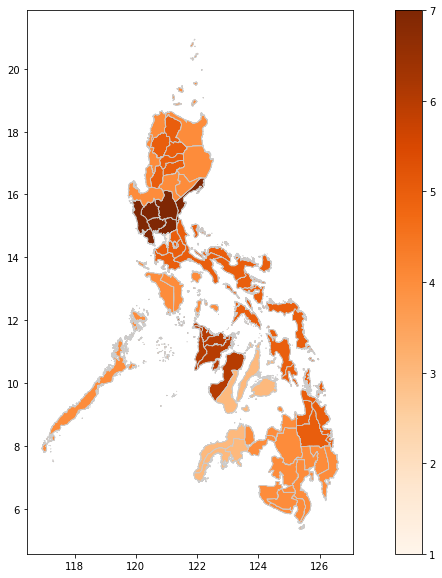

In [147]:
# set a variable that will call whatever column we want to visualise on the map
variable = 'count'
# set the range for the choropleth
vmin, vmax = merge_data_4["count"].min(), merge_data_4["count"].max()
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(15, 10))

# Complete the code
merge_data_4.plot(column=variable, cmap='Oranges', linewidth=0.8, ax=ax, edgecolor='0.8', vmin=vmin, vmax=vmax)

sm = plt.cm.ScalarMappable(cmap='Oranges', norm=plt.Normalize(vmin=vmin, vmax=vmax))
cbar = fig.colorbar(sm)

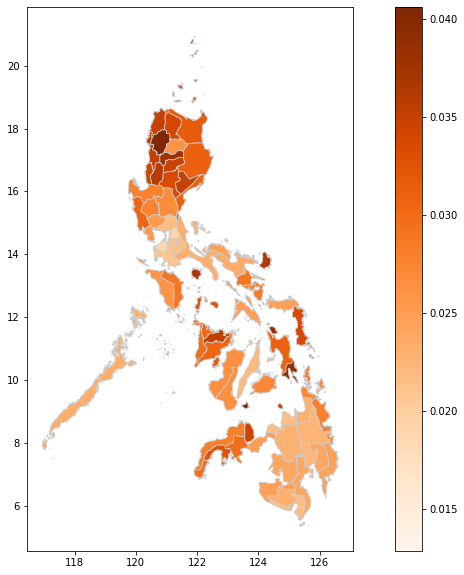

In [41]:
# set a variable that will call whatever column we want to visualise on the map
variable = 'Students per Room Ratio'
# set the range for the choropleth
vmin, vmax = merged_data_2["Students per Room Ratio"].min(), merged_data_2["Students per Room Ratio"].max()
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(15, 10))

# Complete the code
merged_data_2.plot(column=variable, cmap='Oranges', linewidth=0.8, ax=ax, edgecolor='0.8', vmin=vmin, vmax=vmax)

sm = plt.cm.ScalarMappable(cmap='Oranges', norm=plt.Normalize(vmin=vmin, vmax=vmax))
cbar = fig.colorbar(sm)

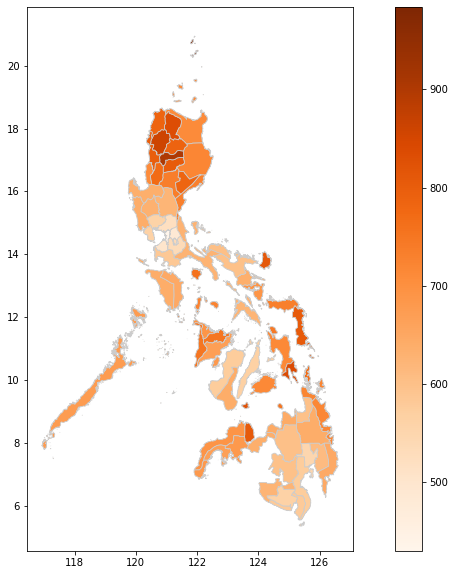

In [42]:
# set a variable that will call whatever column we want to visualise on the map
variable = 'MOOE per Student Ratio'
# set the range for the choropleth
vmin, vmax = merged_data_2["MOOE per Student Ratio"].min(), merged_data_2["MOOE per Student Ratio"].max()
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(15, 10))

# Complete the code
merged_data_2.plot(column=variable, cmap='Oranges', linewidth=0.8, ax=ax, edgecolor='0.8', vmin=vmin, vmax=vmax)

sm = plt.cm.ScalarMappable(cmap='Oranges', norm=plt.Normalize(vmin=vmin, vmax=vmax))
cbar = fig.colorbar(sm)